In [5]:
# Librerias que vamos a usar
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# Crague datos Excel
archivo_excel = 'Datos/BaseInicial.xlsx'
hoja_datos = 'Empresas'

df = pd.read_excel(archivo_excel, sheet_name=hoja_datos)

In [7]:
df.head()

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
1,Warburg Pincus,"New York, New York, United States",Active,NaN,433.0,286.0,22.0,131.0,NaN,NaN,...,USD,3.802820e+07,NaN,34.635,"34,033.67",392.0,53801.0,USD,53801.0,NaN
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.0,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.0,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."


In [11]:
arcos_stage = df.loc[df["Principales inversionistas"].notna(),["Organization Name","Principales inversionistas"]]
lista_empresas_validas = df["Organization Name"].to_list()

diccionario_arcos = {}

for index, row in arcos_stage.iterrows():
    sources  = row["Principales inversionistas"].split(',')
    for source in sources:
        diccionario_arcos[source.strip()] = row["Organization Name"]

arcos_totales = pd.DataFrame(list(diccionario_arcos.items()), columns=['Source', 'Target'])

arcos = arcos_totales[arcos_totales['Source'].isin(lista_empresas_validas) & arcos_totales['Target'].isin(lista_empresas_validas)]
lista_arcos = list(zip(arcos['Source'], arcos['Target']))
print(arcos.shape)
arcos.head()
arcos["Target"].value_counts()




(1266, 2)


Target
BoostUp.ai                       5
Evisort                          5
Blockchain.com                   5
Five9                            5
finleap                          5
                                ..
Reforge                          1
Licious                          1
StartX (Stanford-StartX Fund)    1
Tencent Music Entertainment      1
ESL Gaming                       1
Name: count, Length: 706, dtype: int64

In [19]:
nodos_csv = df.loc[df["Principales inversionistas"].notna(),["Organization Name"]]
nodos_csv.to_csv('Datos/nodos.csv', index=False)
arcos.to_csv('Datos/arcos.csv', index=False)

In [12]:
# Crear una red dirigida
A=nx.DiGraph()
A.add_edges_from(lista_arcos)

In [18]:
print(f'Nodos: {A.number_of_nodes()}')
print(f'Arcos: {A.number_of_edges()}')

Nodos: 1784
Arcos: 1266


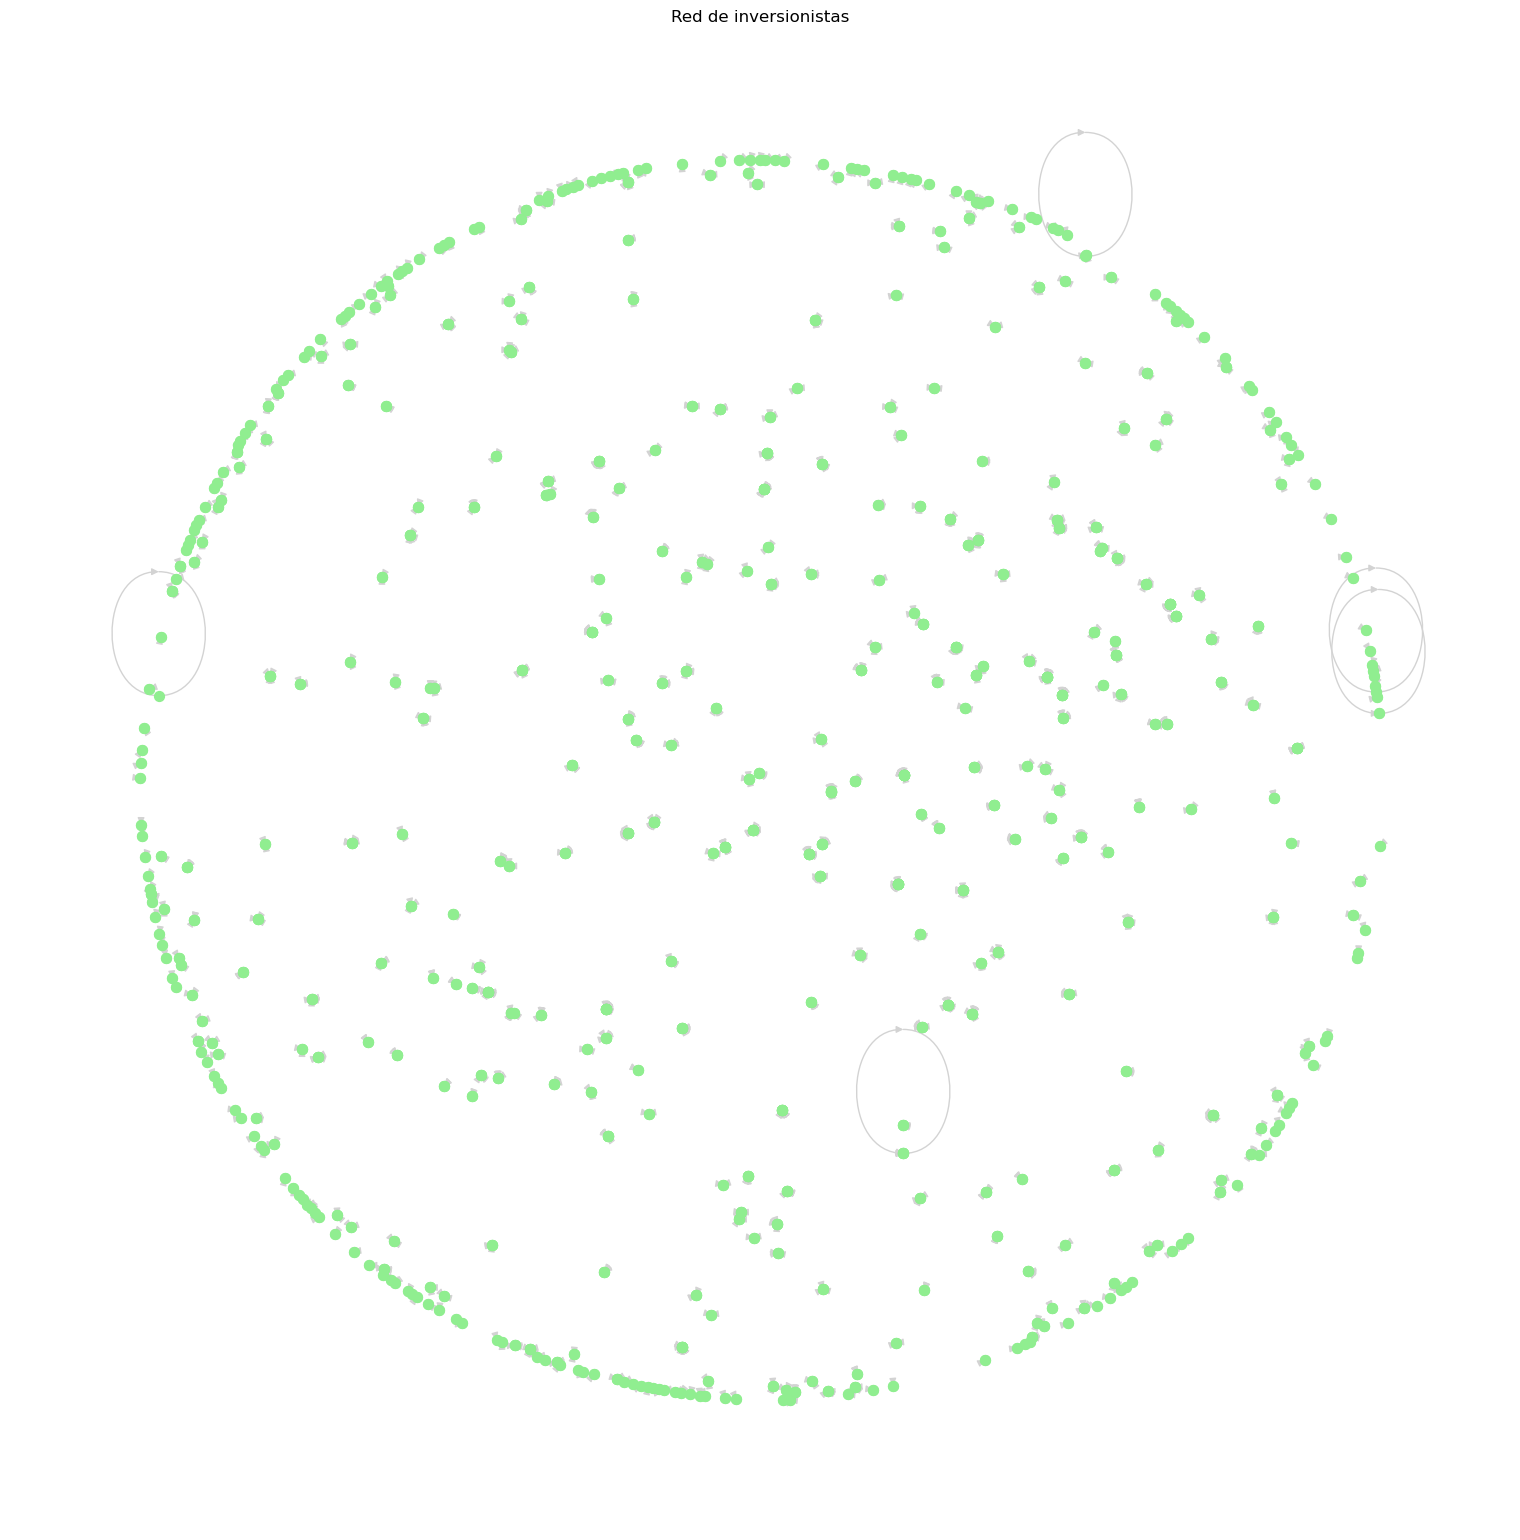

In [15]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(A, node_size=50, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de inversionistas')
# Por último se muestra la gráfica
plt.show()